In [1]:
import numpy as np
import time
import random
import tracemalloc
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

def reverse_array(array):
    return array[::-1]

def bubble_sort(array):
    for i in range(len(array) - 1):
        for j in range(len(array) - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
    return array

def insertion_sort(array):
    for i in range(1, len(array)):
        current_element = array[i]
        j = i - 1
        while j >= 0 and array[j] > current_element:
            array[j + 1] = array[j]
            j -= 1
        array[j + 1] = current_element
    return array

def quick_sort(array):
    if len(array) <= 1:
        return array
    else:
        pivot = array[0]
        left = [x for x in array[1:] if x < pivot]
        right = [x for x in array[1:] if x >= pivot]
        return quick_sort(left) + [pivot] + quick_sort(right)

def binary_search(array):
    low = 0
    high = len(array) - 1
    mid = 0
    value = random.choice(array.copy())

    while low <= high:
        mid = (low + high) // 2
        if array[mid] == value:
            return mid
        elif array[mid] < value:
            low = mid + 1
        else:
            high = mid - 1

    return -1


In [3]:
arrayInt10 = np.random.randint(0, 10, 10).tolist()
arrayInt100 = np.random.randint(0, 100, 100).tolist()
arrayInt1000 = np.random.randint(0, 1000, 1000).tolist()


arrayFloat10 = np.random.uniform(0.0, 10.0, 10).tolist()
arrayFloat100 = np.random.uniform(0.0, 100.0, 100).tolist()
arrayFloat1000 = np.random.uniform(0.0, 1000.0, 1000).tolist()


arrays = [("Int10", arrayInt10), ("Int100", arrayInt100), ("Int1000", arrayInt1000),
    ("Float10", arrayFloat10), ("Float100", arrayFloat100),
    ("Float1000", arrayFloat1000)]

algs = [reverse_array, bubble_sort, insertion_sort, quick_sort, binary_search]


In [4]:
results = {}

# Кількість повторень для більш точного вимірювання часу
repetitions = 5

for name, array in arrays:
    results[name] = {}
    for alg in algs:
        total_time = 0
        total_memory = 0
        for _ in range(repetitions):
            array_copy = array.copy()
            tracemalloc.start()
            start_time = time.perf_counter()
            if alg == binary_search:
                sorted_array = quick_sort(array_copy)  # Binary search requires sorted array
                alg(sorted_array)
            else:
                alg(array_copy.copy())
            end_time = time.perf_counter()
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            total_time += (end_time - start_time)
            total_memory += (peak - current)
        
        avg_time = total_time / repetitions
        avg_memory = total_memory / repetitions
        
        results[name][alg.__name__] = {
            "time": avg_time,
            "memory": avg_memory
        }



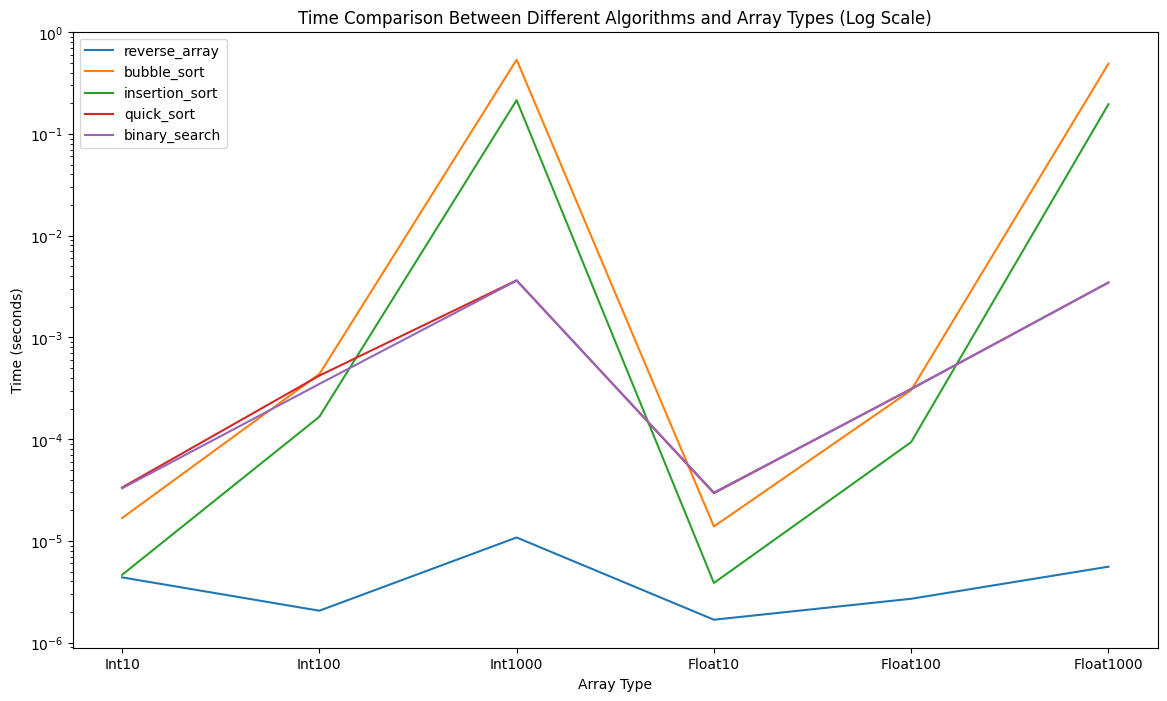

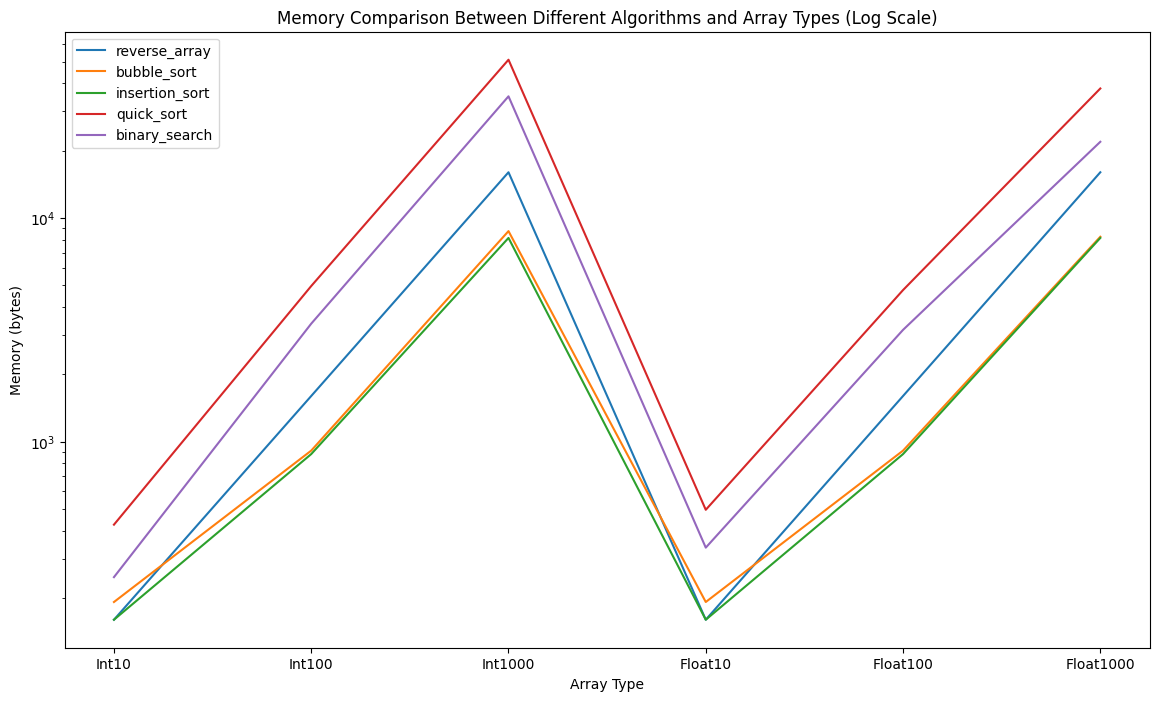

In [5]:
# Time comparison graph with logarithmic scale
plt.figure(figsize=(14, 8))

for alg in algs:
    times = [results[name][alg.__name__]["time"] for name, _ in arrays]
    plt.plot([name for name, _ in arrays], times, label=alg.__name__)

plt.xlabel("Array Type")
plt.ylabel("Time (seconds)")
plt.yscale('log')
plt.title("Time Comparison Between Different Algorithms and Array Types (Log Scale)")
plt.legend()
plt.show()

# Memory comparison graph with logarithmic scale
plt.figure(figsize=(14, 8))

for alg in algs:
    memories = [results[name][alg.__name__]["memory"] for name, _ in arrays]
    plt.plot([name for name, _ in arrays], memories, label=alg.__name__)

plt.xlabel("Array Type")
plt.ylabel("Memory (bytes)")
plt.yscale('log')
plt.title("Memory Comparison Between Different Algorithms and Array Types (Log Scale)")
plt.legend()
plt.show()


In [6]:

# Створюємо пустий DataFrame
df = pd.DataFrame(columns=["Array Type", "Algorithm", "Time (seconds)", "Memory (bytes)"])

# Збираємо всі дані у список словників
data = []
for name, array in arrays:
    for alg in algs:
        data.append({
            "Array Type": name,
            "Algorithm": alg.__name__,
            "Time (seconds)": results[name][alg.__name__]["time"],
            "Memory (bytes)": results[name][alg.__name__]["memory"]
        })

# Конвертуємо список словників у DataFrame
df = pd.DataFrame(data)

# Виводимо таблицю
print(df)


   Array Type       Algorithm  Time (seconds)  Memory (bytes)
0       Int10   reverse_array        0.000004           160.0
1       Int10     bubble_sort        0.000017           192.0
2       Int10  insertion_sort        0.000005           160.0
3       Int10      quick_sort        0.000033           425.6
4       Int10   binary_search        0.000033           248.0
5      Int100   reverse_array        0.000002          1600.0
6      Int100     bubble_sort        0.000436           912.0
7      Int100  insertion_sort        0.000166           880.0
8      Int100      quick_sort        0.000421          4961.6
9      Int100   binary_search        0.000349          3368.0
10    Int1000   reverse_array        0.000011         16000.0
11    Int1000     bubble_sort        0.535388          8731.8
12    Int1000  insertion_sort        0.214500          8140.0
13    Int1000      quick_sort        0.003637         50953.6
14    Int1000   binary_search        0.003612         34960.0
15    Fl